# 1. Makeover

In [25]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df = duckdb.query(
    """
    SELECT avg_CO2, year, month
    FROM df

"""
).df()

df

,Avg_CO2,Year,Month
0,152,2007,1
1,156,2007,2
2,159,2007,3
3,160,2007,4
4,160,2007,5
...,...,...,...
116,88,2016,9
117,91,2016,10
118,88,2016,11
119,98,2016,12


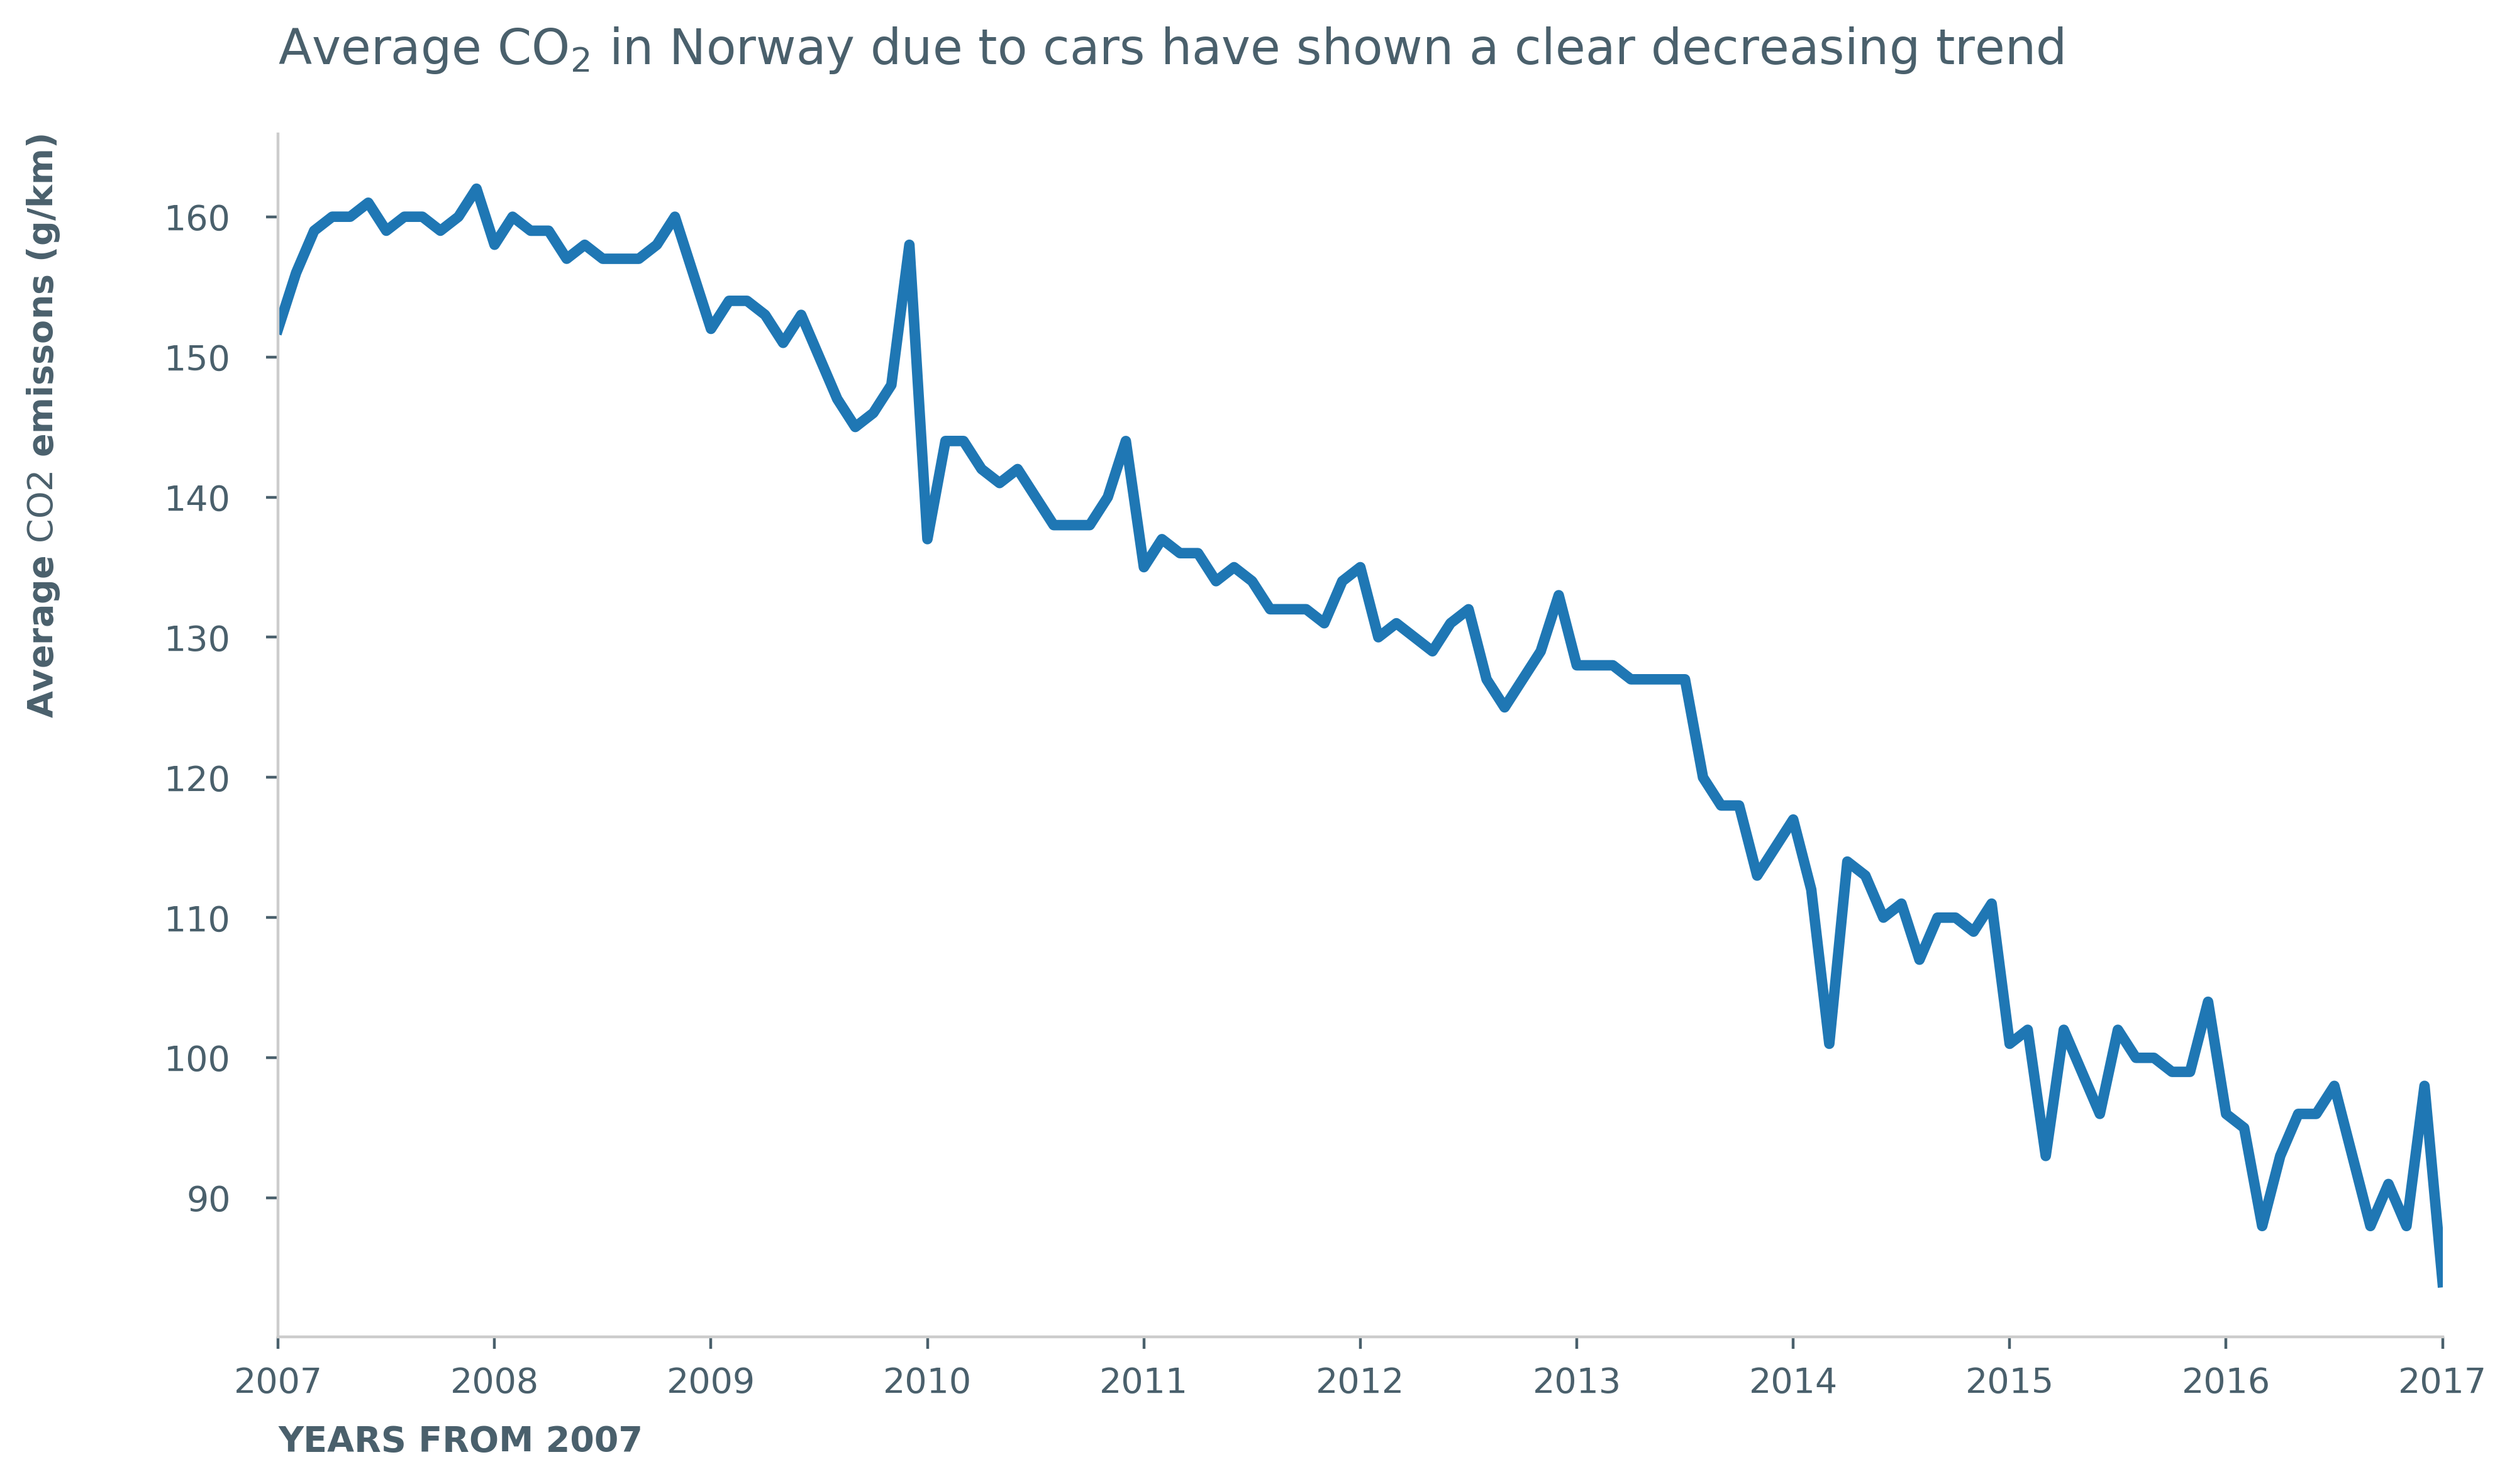

In [26]:
import matplotlib.pyplot as plt
from chart_utils import label_options, save_fig_from_ax

plt.style.use("styles/base.mplstyle")
df["date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

df = df.set_index("date")

ax = df["Avg_CO2"].plot()

ax = label_options(
    ax, 
    title="Average CO$_2$ in Norway due to cars have shown a clear decreasing trend", 
    xlabel="YEARS FROM 2007",
)
ax.set_ylabel(r"Average $\mathrm{CO2}$ emissons (g/km)", loc="top", rotation=90)

fig = save_fig_from_ax(ax, "figures/CO2_cars_Norway.png")